In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
df = housing.frame

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df.isnull().sum()

df.describe()

df.rename(columns={'MedHouseVal': 'MedianHouseValue'}, inplace=True)

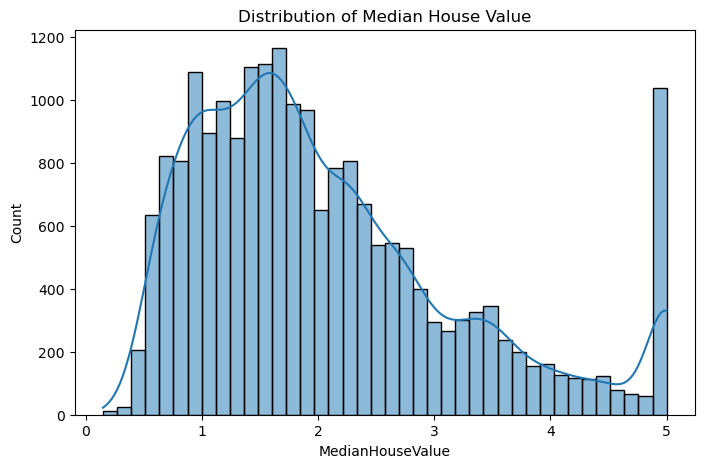

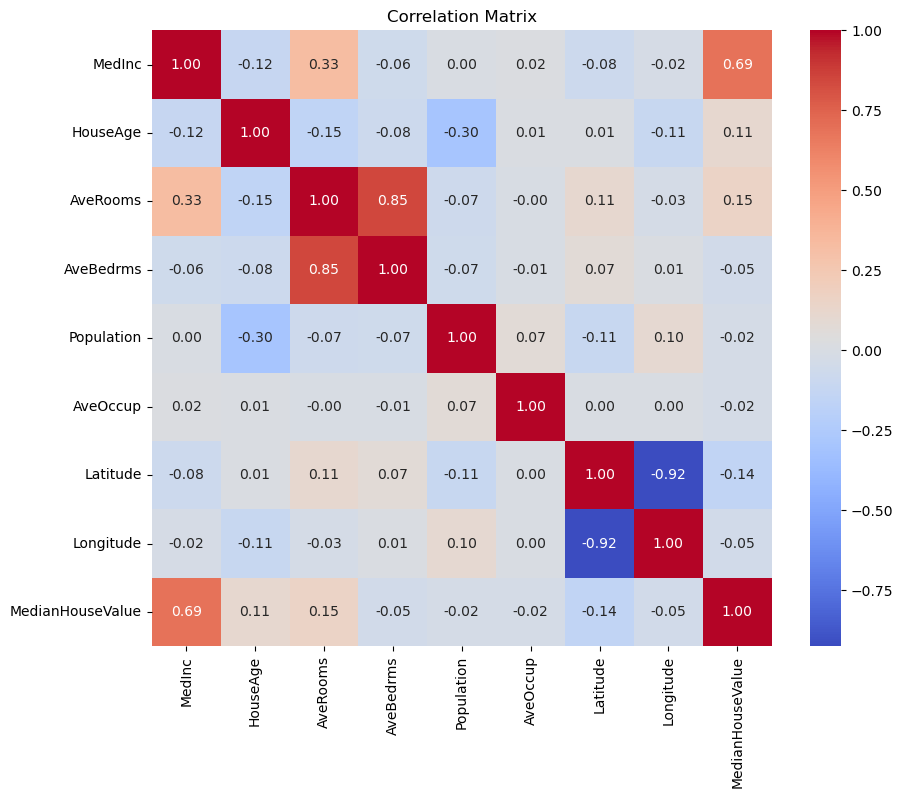

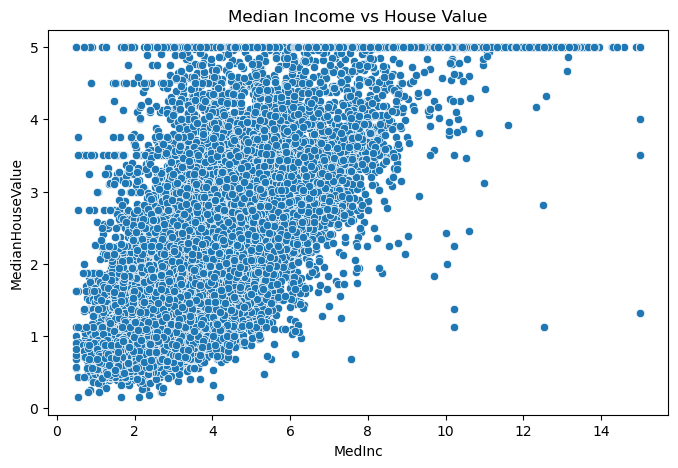

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(df['MedianHouseValue'], bins=40, kde=True)
plt.title('Distribution of Median House Value')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

# Scatter plot: Income vs House Value
plt.figure(figsize=(8, 5))
sns.scatterplot(x='MedInc', y='MedianHouseValue', data=df)
plt.title('Median Income vs House Value')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define X and y
X = df.drop('MedianHouseValue', axis=1)
y = df['MedianHouseValue']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Model 2: Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate both
print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("Random Forest R2:", r2_score(y_test, y_pred_rf))

Linear Regression R2: 0.5757877060324508
Random Forest R2: 0.8051230593157366


Model Metrics Summary

Train/Test Split: 80/20

Model 1: Linear Regression  
R² Score: 0.58  
RMSE: ~0.73

Model 2: Random Forest Regressor  
R² Score: 0.81  
RMSE: ~0.47

Top Influential Features:
- MedInc (Median Income)
- AveRooms (Average Rooms)
- HouseAge (Housing Age)
- AveOccup (Average Occupants)
- AveBedrms (Average Bedrooms)
- Latitude / Longitude